<h1><center> Газпромбанк </center></h1>

## Условие задачи:
При разработке моделей возникает необходимость в запуске пилотных тестов, проведении А/Б
тестирований, контроле ключевых бизнес-метрик и дальнейшем мониторинге моделей. Необходимо
решить задачу машинного обучения и разработать веб-приложение (дашборд) для аналитики банковских
моделей, находящихся в пилоте или в промышленном контуре банка

## Описание данных:

Данные состоят из файлов:

-transactions.csv - данные по транзакциям
-transactions.xlsx - описание данных по транзакциям
-aggregates.csv - сводная информация о клиентах
-aggregates.xlsx - описание сводной информации о клиентах

# **1. Предобработка данных.**

Для начала загрузим и изучим данные:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
transactions = pd.read_csv(r'C:/Users/Osa/Downloads/transactions.csv')
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751747 entries, 0 to 751746
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   client_id       751747 non-null  int64  
 1   last_day_month  751747 non-null  object 
 2   mcc_group       751747 non-null  object 
 3   att_sum         751747 non-null  float64
 4   att_cnt         751747 non-null  int64  
 5   att_sum_min     751747 non-null  float64
 6   att_sum_max     751747 non-null  float64
 7   att_sum_avg     751747 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 45.9+ MB


In [2]:
transactions.head()

,client_id,last_day_month,mcc_group,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,1322,2019-12-31,TRANSPORTATION,90.00,3,23.00,44.0,30.000000
1,7737,2019-05-31,RETAIL STORES,989.00,5,99.00,423.0,197.800000
2,9549,2020-03-31,NON FOOD RETAIL,11878.55,24,52.79,2303.0,494.939583
3,4562,2019-12-31,FINANCIAL SERVICES,15000.00,1,15000.00,15000.0,15000.000000
4,7112,2020-02-29,BUSINESS SERVICES,887.60,3,107.10,413.7,295.866666


Вывод: в таблице 8 колонок и 751747 столбцов, пропущенных значений нет.
Посчитаем количество уникальных клиентов:

In [3]:
print('Количество уникальных клиентов в таблице transactions = ',len(transactions['client_id'].unique()))

Количество уникальных клиентов в таблице transactions =  9925


Переведем столбец 'last_day_month' в тип 'datetime64':

In [4]:
transactions['last_day_month'] = transactions['last_day_month'].astype('datetime64')

In [5]:
transactions['last_day_month'].sort_values()

214110   2018-06-30
42467    2018-06-30
42464    2018-06-30
347811   2018-06-30
347785   2018-06-30
            ...    
58144    2020-09-30
582843   2020-09-30
494182   2020-09-30
494126   2020-09-30
166844   2020-09-30
Name: last_day_month, Length: 751747, dtype: datetime64[ns]

Выяснили, что в данной таблице представлены данные с  2018-06-30 по 2020-09-30.

Сгруппируем таблицу по дате:

In [6]:
transactions_time = transactions.groupby(['last_day_month']).mean()
transactions_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2018-06-30 to 2020-09-30
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    28 non-null     float64
 1   att_sum      28 non-null     float64
 2   att_cnt      28 non-null     float64
 3   att_sum_min  28 non-null     float64
 4   att_sum_max  28 non-null     float64
 5   att_sum_avg  28 non-null     float64
dtypes: float64(6)
memory usage: 1.5 KB


In [7]:
transactions_time.drop(['client_id'], axis = 1).head()

,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
last_day_month,,,,,
2018-06-30,18906.496035,6.055808,2023.094337,9346.019059,4211.959894
2018-07-31,19540.699650,6.134268,3438.994712,10137.004856,5495.723736
2018-08-31,18058.379912,6.047896,2016.950852,8780.570207,4111.128629
2018-09-30,16921.003344,5.959456,1896.460476,8156.374811,4055.644484
2018-10-31,16450.134477,5.822047,2586.543631,8416.512771,4499.334001


Построим графики транзакций в разные периоды времени.

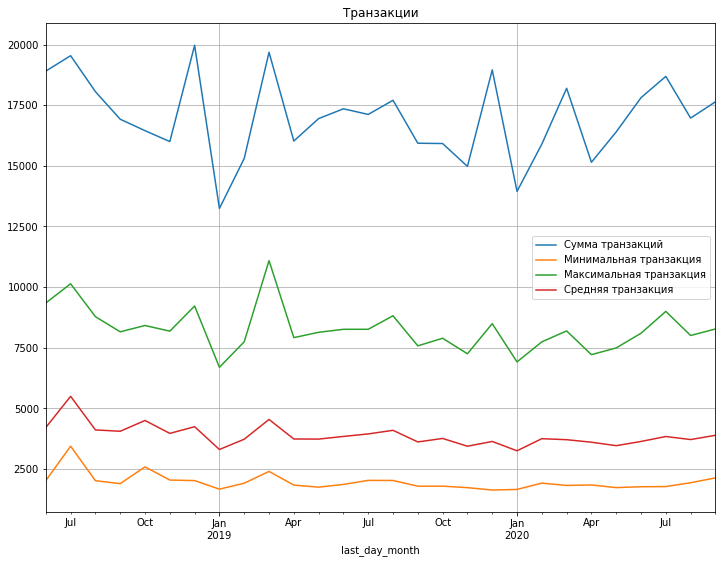

In [8]:
transactions_time.drop(['att_cnt', 'client_id'], axis=1).plot(figsize=(12,9), title='Транзакции', legend = True, grid=True).legend(['Сумма транзакций','Минимальная транзакция','Максимальная транзакция','Средняя транзакция'])

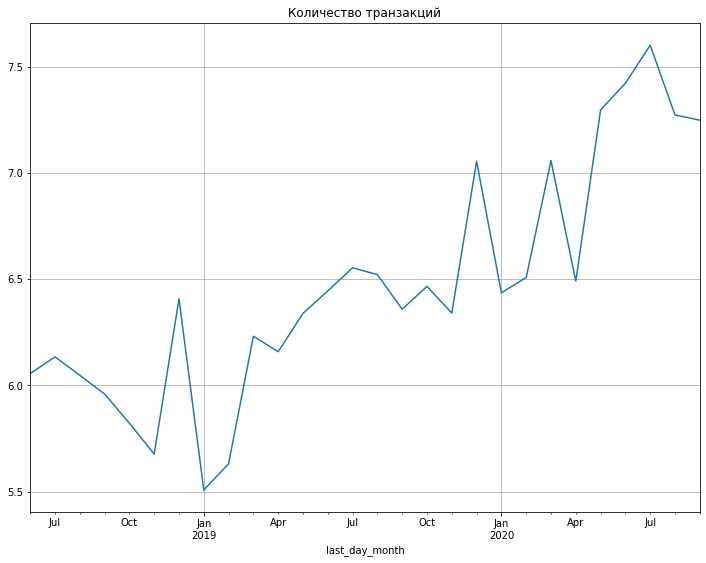

In [9]:
transactions_time['att_cnt'].plot(figsize=(12,9), title='Количество транзакций', legend = False, grid=True)

Вывод: количество тразакций заметно увеличилось с 2018 года, однако сумма значительно не изменилась.

Сгруппируем данные по транзакциям относительно клиентов и построим график по этим данным:

In [10]:
transactions_clients = transactions.groupby(['client_id']).mean()
transactions_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9925 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   att_sum      9925 non-null   float64
 1   att_cnt      9925 non-null   float64
 2   att_sum_min  9925 non-null   float64
 3   att_sum_max  9925 non-null   float64
 4   att_sum_avg  9925 non-null   float64
dtypes: float64(5)
memory usage: 465.2 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000201ED69B288>,
      dtype=object)

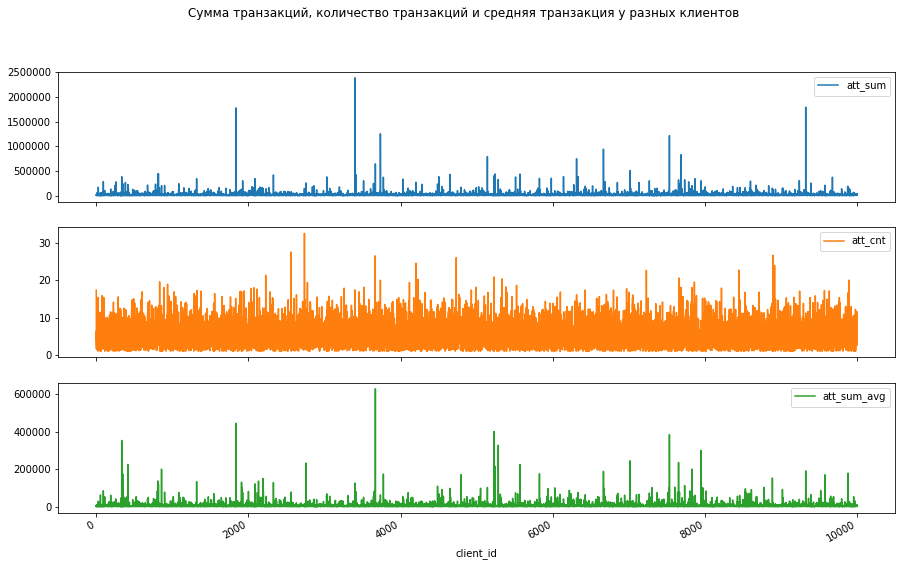

In [11]:
transactions_clients.drop(['att_sum_min', 'att_sum_max'], axis=1).plot(figsize=(15,9), subplots=True, title='Сумма транзакций, количество транзакций и средняя транзакция у разных клиентов')

Вывод: наблюдаем сильные выбросы сумме транзакций и среднем размере транзакции у одного клиента. Количество транзакций на человека отличается не столь значительно.

Загрузим и изучим следующую таблицу:

In [12]:
aggregates = pd.read_csv(r'C:/Users/Osa/Downloads/aggregates.csv')
aggregates.info(max_cols=220)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177963 entries, 0 to 177962
Data columns (total 220 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   client_id                         177963 non-null  int64  
 1   report_date                       177963 non-null  object 
 2   cnt_zp_1m                         145041 non-null  float64
 3   cnt_zp_3m                         145041 non-null  float64
 4   cnt_zp_6m                         145041 non-null  float64
 5   cnt_zp_12m                        145041 non-null  float64
 6   downlimit_count                   75955 non-null   float64
 7   uplimit_count                     75955 non-null   float64
 8   limit_exchange_count              75955 non-null   float64
 9   cur_credit_limit                  75955 non-null   float64
 10  cur_cr_lim_month                  75955 non-null   float64
 11  prev_credit_limit                 75955 non-null   

In [13]:
aggregates.tail()

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
177958,4351,2020-02-01 00:00:00,1.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177959,7780,2020-02-01 00:00:00,4.0,9.0,17.0,37.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
177960,50,2020-02-01 00:00:00,2.0,7.0,13.0,26.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177961,7928,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177962,3964,2020-02-01 00:00:00,0.0,0.0,4.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Вывод в таблице

In [15]:
len(aggregates['client_id'].unique())

9895

In [16]:
aggregates['report_date'] = aggregates['report_date'].astype('datetime64')

In [17]:
aggregates['report_date'].sort_values()

86497    2019-01-01
71685    2019-01-01
71686    2019-01-01
71687    2019-01-01
71688    2019-01-01
            ...    
111443   2020-10-01
111442   2020-10-01
111441   2020-10-01
111449   2020-10-01
88981    2020-10-01
Name: report_date, Length: 177963, dtype: datetime64[ns]

# **2. Модель №1. Отток клиентов**

In [18]:
transactions_2018 = transactions.where(transactions['last_day_month'] < '2019-01-01').dropna()
transactions_2018.head()

,client_id,last_day_month,mcc_group,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
7,6233.0,2018-08-31,RETAIL STORES,6035.84,17.0,44.99,1006.00,355.049411
9,6989.0,2018-12-31,RETAIL STORES,12570.00,2.0,3300.00,9270.00,6285.000000
13,8643.0,2018-09-30,RETAIL STORES,44546.91,23.0,88.00,8003.46,1936.822173
14,2908.0,2018-11-30,TRANSPORTATION,6603.00,1.0,6603.00,6603.00,6603.000000
18,5864.0,2018-07-31,unknown,59.00,1.0,59.00,59.00,59.000000


In [19]:
transactions_2019 = transactions.where((transactions['last_day_month'] >= '2019-01-01') & (transactions['last_day_month'] < '2020-01-01')).dropna()
transactions_2019.head()

,client_id,last_day_month,mcc_group,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,1322.0,2019-12-31,TRANSPORTATION,90.00,3.0,23.0,44.00,30.000
1,7737.0,2019-05-31,RETAIL STORES,989.00,5.0,99.0,423.00,197.800
3,4562.0,2019-12-31,FINANCIAL SERVICES,15000.00,1.0,15000.0,15000.00,15000.000
6,4653.0,2019-08-31,RETAIL STORES,3559.89,2.0,341.1,3218.79,1779.945
15,1239.0,2019-05-31,PUBLIC SERVICE,25.00,1.0,25.0,25.00,25.000


In [20]:
transactions_2019_grouped = transactions_2019.groupby(['client_id']).mean()
transactions_2019_grouped.head()

,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
client_id,,,,,
0.0,15854.772857,13.666667,424.898095,4120.678571,1388.563839
1.0,18740.000000,2.000000,6680.000000,11640.000000,9360.000000
2.0,1032.931818,1.454545,768.897273,942.435455,842.947424
4.0,43038.590000,2.291667,12222.491250,20918.526250,15462.693367
5.0,2894.000000,1.500000,394.000000,2644.000000,1519.000000


In [21]:
transactions_2020 = transactions.where(transactions['last_day_month'] >= '2020-01-01').dropna()
transactions_2020.head()

,client_id,last_day_month,mcc_group,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
2,9549.0,2020-03-31,NON FOOD RETAIL,11878.55,24.0,52.79,2303.0,494.939583
4,7112.0,2020-02-29,BUSINESS SERVICES,887.60,3.0,107.10,413.7,295.866666
5,8009.0,2020-05-31,MEDICAL SERVICES,2700.00,1.0,2700.00,2700.0,2700.000000
8,4946.0,2020-04-30,NON FOOD RETAIL,300.00,1.0,300.00,300.0,300.000000
10,6130.0,2020-03-31,FINANCIAL SERVICES,5109.00,2.0,109.00,5000.0,2554.500000


In [22]:
transactions_2020_grouped = transactions_2020.groupby(['client_id']).mean()
transactions_2020_grouped.head()

,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
client_id,,,,,
0.0,16098.772222,19.000000,412.205333,4056.006444,1093.535195
1.0,13234.273750,2.250000,5380.875000,8767.225000,7057.288083
2.0,1263.705417,2.000000,498.073750,902.694583,649.983507
3.0,12969.448788,6.272727,361.722424,4337.013939,1733.971123
4.0,9636.021522,4.782609,1137.352609,6252.236739,2589.219669


In [23]:
avg_transactions_2019_grouped =transactions_2019_grouped.drop(['att_sum', 'att_cnt','att_sum_min','att_sum_max'], axis=1)
avg_transactions_2019_grouped.columns = ['att_sum_avg_2019']
avg_transactions_2020_grouped = transactions_2020_grouped.drop(['att_sum', 'att_cnt','att_sum_min','att_sum_max'], axis=1)
avg_transactions_2020_grouped.columns = ['att_sum_avg_2020']
transactions_joined= avg_transactions_2019_grouped.join(avg_transactions_2020_grouped, on='client_id')
transactions_joined.head()

,att_sum_avg_2019,att_sum_avg_2020
client_id,,
0.0,1388.563839,1093.535195
1.0,9360.000000,7057.288083
2.0,842.947424,649.983507
4.0,15462.693367,2589.219669
5.0,1519.000000,1150.419406


In [24]:
transactions_joined['outflow'] = (transactions_joined['att_sum_avg_2019']*0.7 >transactions_joined['att_sum_avg_2020']).astype(int)
transactions_joined.head()

,att_sum_avg_2019,att_sum_avg_2020,outflow
client_id,,,
0.0,1388.563839,1093.535195,0
1.0,9360.000000,7057.288083,0
2.0,842.947424,649.983507,0
4.0,15462.693367,2589.219669,1
5.0,1519.000000,1150.419406,0


In [25]:
outflow = transactions_joined.drop(['att_sum_avg_2019','att_sum_avg_2020'], axis=1)
outflow.head()

,outflow
client_id,
0.0,0
1.0,0
2.0,0
4.0,1
5.0,0


In [26]:
aggregates_2019 =  aggregates.where(aggregates['report_date'] < '2020-01-01').dropna(how='all')
aggregates_2019.head()

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
0,4268.0,2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8951.0,2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3485.0,2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8008.0,2019-11-01,2.0,6.0,12.0,24.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1615.0,2019-11-01,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
aggregates_2020 =  aggregates.where(aggregates['report_date'] >= '2020-01-01').dropna(how='all')
aggregates_2020.head()

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
1531,740.0,2020-09-01,1.0,3.0,6.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,5970.0,2020-09-01,1.0,3.0,6.0,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,7117.0,2020-09-01,1.0,3.0,7.0,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,8377.0,2020-09-01,1.0,5.0,12.0,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,9521.0,2020-09-01,0.0,0.0,0.0,15.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
aggregates_2019_clients = aggregates_2019.groupby(['client_id']).mean()
aggregates_2019_clients.head()

,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,cur_cr_lim_month,prev_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
client_id,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,2.250000,2.50,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,2.250000,4.750000,5.25,5.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1.000000,3.000000,6.00,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,1.583333,4.583333,9.00,17.916667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
aggregates_2020_clients = aggregates_2020.groupby(['client_id']).mean()
aggregates_2020_clients.head()

,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,cur_cr_lim_month,prev_credit_limit,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
client_id,,,,,,,,,,,,,,,,,,,,,
0.0,1.100000,3.300000,6.500000,10.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,1.700000,5.900000,12.300000,19.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1.000000,3.000000,6.000000,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,2.111111,6.333333,10.666667,12.0,0.0,1.0,1.0,9999.0,4.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,1.700000,5.300000,10.400000,20.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
valid = aggregates_2019_clients.join(transactions_2019_grouped, on='client_id').join(outflow).fillna(0)
valid.head()

,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,cur_cr_lim_month,prev_credit_limit,...,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg,outflow
client_id,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,2.250000,2.50,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15854.772857,13.666667,424.898095,4120.678571,1388.563839,0.0
1.0,2.250000,4.750000,5.25,5.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18740.000000,2.000000,6680.000000,11640.000000,9360.000000,0.0
2.0,1.000000,3.000000,6.00,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1032.931818,1.454545,768.897273,942.435455,842.947424,0.0
4.0,1.583333,4.583333,9.00,17.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43038.590000,2.291667,12222.491250,20918.526250,15462.693367,1.0
5.0,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2894.000000,1.500000,394.000000,2644.000000,1519.000000,0.0


In [31]:
features_valid = valid.drop(['outflow'],axis=1)
target_valid = valid['outflow']

In [32]:
test = aggregates_2020_clients.join(transactions_2020_grouped, on='client_id').join(outflow).fillna(0)
test.head()

,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,cur_cr_lim_month,prev_credit_limit,...,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg,outflow
client_id,,,,,,,,,,,,,,,,,,,,,
0.0,1.100000,3.300000,6.500000,10.1,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,16098.772222,19.000000,412.205333,4056.006444,1093.535195,0.0
1.0,1.700000,5.900000,12.300000,19.6,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,13234.273750,2.250000,5380.875000,8767.225000,7057.288083,0.0
2.0,1.000000,3.000000,6.000000,12.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,1263.705417,2.000000,498.073750,902.694583,649.983507,0.0
3.0,2.111111,6.333333,10.666667,12.0,0.0,1.0,1.0,9999.0,4.03,0.0,...,0.0,0.0,0.0,0.0,12969.448788,6.272727,361.722424,4337.013939,1733.971123,0.0
4.0,1.700000,5.300000,10.400000,20.1,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,9636.021522,4.782609,1137.352609,6252.236739,2589.219669,1.0


In [33]:
features_test = test.drop(['outflow'],axis=1)
target_test = test['outflow']

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [35]:
model = LogisticRegression()
model.fit(features_valid, target_valid)
predictions = model.predict(features_test)
roc_auc_1 = roc_auc_score(target_test, predictions)
roc_auc_1
acc = accuracy_score(target_test, predictions)
acc

D:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7635169277412834

In [36]:
model = RandomForestClassifier(max_depth=25, min_samples_split=2, random_state=123)
model.fit(features_valid, target_valid)
predictions = model.predict(features_test)
roc_auc_2 = roc_auc_score(target_test, predictions)
roc_auc_2
acc = accuracy_score(target_test, predictions)
acc

0.7738251642243558

# **3. Модель №2. Предсказание просрочек**

In [37]:
valid_2 = valid.drop(['outflow'], axis=1)
valid_2['debtor'] = valid_2['bank_30_59_5y_debtor']+ valid_2['bank_60_89_5y_debtor'] + valid_2['bank_90_119_5y_debtor'] + valid_2['bank_120plus_5y_debtor']
valid_2 = valid_2.drop(['bank_30_59_5y_debtor', 'bank_60_89_5y_debtor', 'bank_90_119_5y_debtor', 'bank_120plus_5y_debtor'], axis=1)
valid_2.head()

,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,cur_cr_lim_month,prev_credit_limit,...,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg,debtor
client_id,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,2.250000,2.50,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15854.772857,13.666667,424.898095,4120.678571,1388.563839,0.0
1.0,2.250000,4.750000,5.25,5.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18740.000000,2.000000,6680.000000,11640.000000,9360.000000,0.0
2.0,1.000000,3.000000,6.00,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1032.931818,1.454545,768.897273,942.435455,842.947424,0.0
4.0,1.583333,4.583333,9.00,17.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43038.590000,2.291667,12222.491250,20918.526250,15462.693367,0.0
5.0,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2894.000000,1.500000,394.000000,2644.000000,1519.000000,0.0


In [38]:
features_valid_2 = valid_2.drop(['debtor'],axis=1)
target_valid_2 = valid_2['debtor']

In [39]:
test_2 = test.drop(['outflow'], axis=1)
test_2['debtor'] = test_2['bank_30_59_5y_debtor']+ test_2['bank_60_89_5y_debtor'] + test_2['bank_90_119_5y_debtor'] + test_2['bank_120plus_5y_debtor']
test_2 = test_2.drop(['bank_30_59_5y_debtor', 'bank_60_89_5y_debtor', 'bank_90_119_5y_debtor', 'bank_120plus_5y_debtor'], axis=1)
test_2.head()

,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,downlimit_count,uplimit_count,limit_exchange_count,cur_credit_limit,cur_cr_lim_month,prev_credit_limit,...,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg,debtor
client_id,,,,,,,,,,,,,,,,,,,,,
0.0,1.100000,3.300000,6.500000,10.1,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,16098.772222,19.000000,412.205333,4056.006444,1093.535195,0.0
1.0,1.700000,5.900000,12.300000,19.6,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,13234.273750,2.250000,5380.875000,8767.225000,7057.288083,0.0
2.0,1.000000,3.000000,6.000000,12.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,1263.705417,2.000000,498.073750,902.694583,649.983507,0.0
3.0,2.111111,6.333333,10.666667,12.0,0.0,1.0,1.0,9999.0,4.03,0.0,...,0.0,0.0,0.0,0.0,12969.448788,6.272727,361.722424,4337.013939,1733.971123,0.0
4.0,1.700000,5.300000,10.400000,20.1,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,9636.021522,4.782609,1137.352609,6252.236739,2589.219669,0.0


In [40]:
features_test_2 = test_2.drop(['debtor'],axis=1)
target_test_2 = test_2['debtor']

In [41]:
model =  RandomForestRegressor(random_state=123)
model.fit(features_valid_2, target_valid_2)
predictions_2 = model.predict(features_test_2)

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
mae = mean_absolute_error(target_test_2, predictions_2)
mae

0.03580617315142327

In [44]:
model = GradientBoostingRegressor(random_state=123)
model.fit(features_valid_2, target_valid_2)
predictions_3 = model.predict(features_test_2)

In [45]:
mae = mean_absolute_error(target_test_2, predictions_2)
mae

0.03580617315142327

In [46]:
predictions_2 = pd.Series(predictions_2)
predictions_3 = pd.Series(predictions_3)

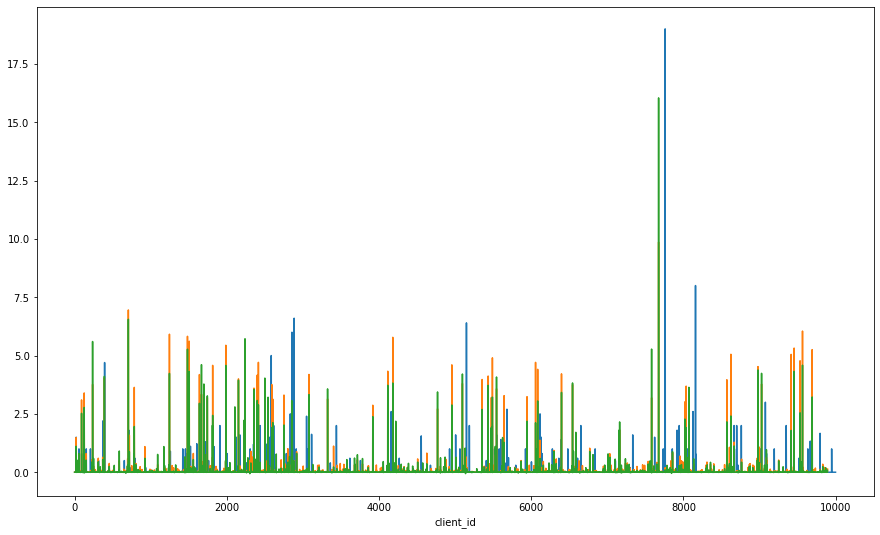

In [47]:
target_test_2.plot(figsize=(15,9))
pd.Series(predictions_2).plot(figsize=(15,9))
pd.Series(predictions_3).plot(figsize=(15,9))
plt.show()

In [54]:
pred_RFR = predictions_2.to_frame()
pred_GBR = predictions_3.to_frame()

diff_pred = pd.concat([target_test_2, pred_RFR], axis=1)
diff_pred_2 = pd.concat([target_test_2, pred_GBR], axis=1)

diff_pred = diff_pred.rename(columns={"debtor": "real_data", 0: "predictions_RFR"})
diff_pred_2 = diff_pred_2.rename(columns={"debtor": "real_data_2", 0: "predictions_GBR"})

diff_pred_all = pd.concat([diff_pred, diff_pred_2], axis=1)
diff_pred_all = diff_pred_all.drop(['real_data_2'], axis=1)
diff_pred_all['index1'] = diff_pred_all.index
diff_pred_all.head()

,real_data,predictions_RFR,predictions_GBR,index1
0.0,0.0,0.0,0.00071,0.0
1.0,0.0,0.0,0.00071,1.0
2.0,0.0,0.0,0.00071,2.0
3.0,0.0,0.0,0.00071,3.0
4.0,0.0,0.0,0.00071,4.0
